In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

# 0 Problem Definition

# 1 Data Collection
https://www.nasdaq.com/market-activity/index/spx/historical?page=254&rows_per_page=10&timeline=y10

In [2]:
stock=pd.read_csv("HistoricalData_1698466668181.csv")

In [3]:
stock.head()

,Date,Close/Last,Open,High,Low
0,10/25/2023,4186.77,4232.42,4232.42,4181.42
1,10/24/2023,4247.68,4235.79,4259.38,4219.43
2,10/23/2023,4217.04,4210.40,4255.84,4189.22
3,10/20/2023,4224.16,4273.85,4276.56,4223.03
4,10/19/2023,4278.00,4321.36,4339.54,4269.69


In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2537 non-null   object 
 1   Close/Last  2537 non-null   float64
 2   Open        2537 non-null   float64
 3   High        2537 non-null   float64
 4   Low         2537 non-null   float64
dtypes: float64(4), object(1)
memory usage: 99.2+ KB


# 2 Data preprocessing

In [5]:
# change column name
stock.rename(columns={"Close/Last":"Close"},inplace=True)

In [6]:
stock.Close.head()

0    4186.77
1    4247.68
2    4217.04
3    4224.16
4    4278.00
Name: Close, dtype: float64

In [7]:
#convert data to a datastamp
stock.Date=pd.to_datetime(stock.Date)
stock

,Date,Close,Open,High,Low
0,2023-10-25,4186.77,4232.42,4232.42,4181.42
1,2023-10-24,4247.68,4235.79,4259.38,4219.43
2,2023-10-23,4217.04,4210.40,4255.84,4189.22
3,2023-10-20,4224.16,4273.85,4276.56,4223.03
4,2023-10-19,4278.00,4321.36,4339.54,4269.69
...,...,...,...,...,...
2532,2013-10-31,1756.54,1763.24,1768.53,1755.72
2533,2013-10-30,1763.31,1772.27,1775.22,1757.24
2534,2013-10-29,1771.95,1762.93,1772.09,1762.93
2535,2013-10-28,1762.11,1759.42,1764.99,1757.67


In [8]:
#reverse the data so that the date is increasing
stock=stock.iloc[::-1].reset_index(drop=True)

In [9]:
stock

,Date,Close,Open,High,Low
0,2013-10-25,1759.77,1756.01,1759.82,1752.45
1,2013-10-28,1762.11,1759.42,1764.99,1757.67
2,2013-10-29,1771.95,1762.93,1772.09,1762.93
3,2013-10-30,1763.31,1772.27,1775.22,1757.24
4,2013-10-31,1756.54,1763.24,1768.53,1755.72
...,...,...,...,...,...
2532,2023-10-19,4278.00,4321.36,4339.54,4269.69
2533,2023-10-20,4224.16,4273.85,4276.56,4223.03
2534,2023-10-23,4217.04,4210.40,4255.84,4189.22
2535,2023-10-24,4247.68,4235.79,4259.38,4219.43


In [11]:
stock[stock.High==0]

,Date,Close,Open,High,Low
24,2013-11-28,1807.23,0.0,0.0,0.0
43,2013-12-25,1833.32,0.0,0.0,0.0
48,2014-01-01,1848.36,0.0,0.0,0.0
61,2014-01-20,1838.70,0.0,0.0,0.0
81,2014-02-17,1838.63,0.0,0.0,0.0
125,2014-04-18,1864.85,0.0,0.0,0.0
151,2014-05-26,1900.53,0.0,0.0,0.0
180,2014-07-04,1985.44,0.0,0.0,0.0
221,2014-09-01,2003.37,0.0,0.0,0.0
284,2014-11-27,2072.83,0.0,0.0,0.0


In [15]:
# drop the rows that High is 0 because of no tradiong on holidays?
stock=stock[stock.High!=0].reset_index(drop=True)

In [ ]:
# 

# 3 EDA

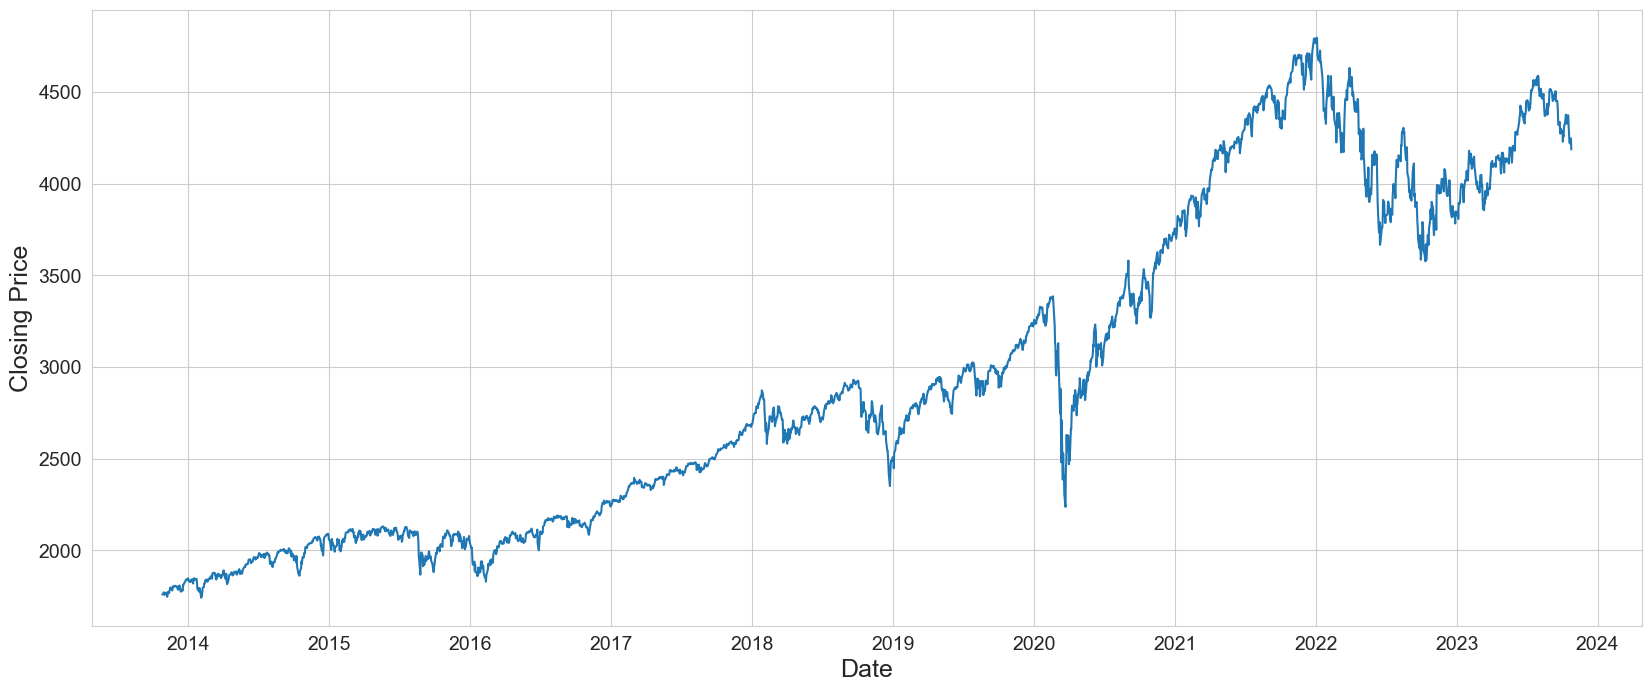

In [16]:
plt.figure(figsize=(20,8))

plt.plot(stock.Date, stock.Close)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

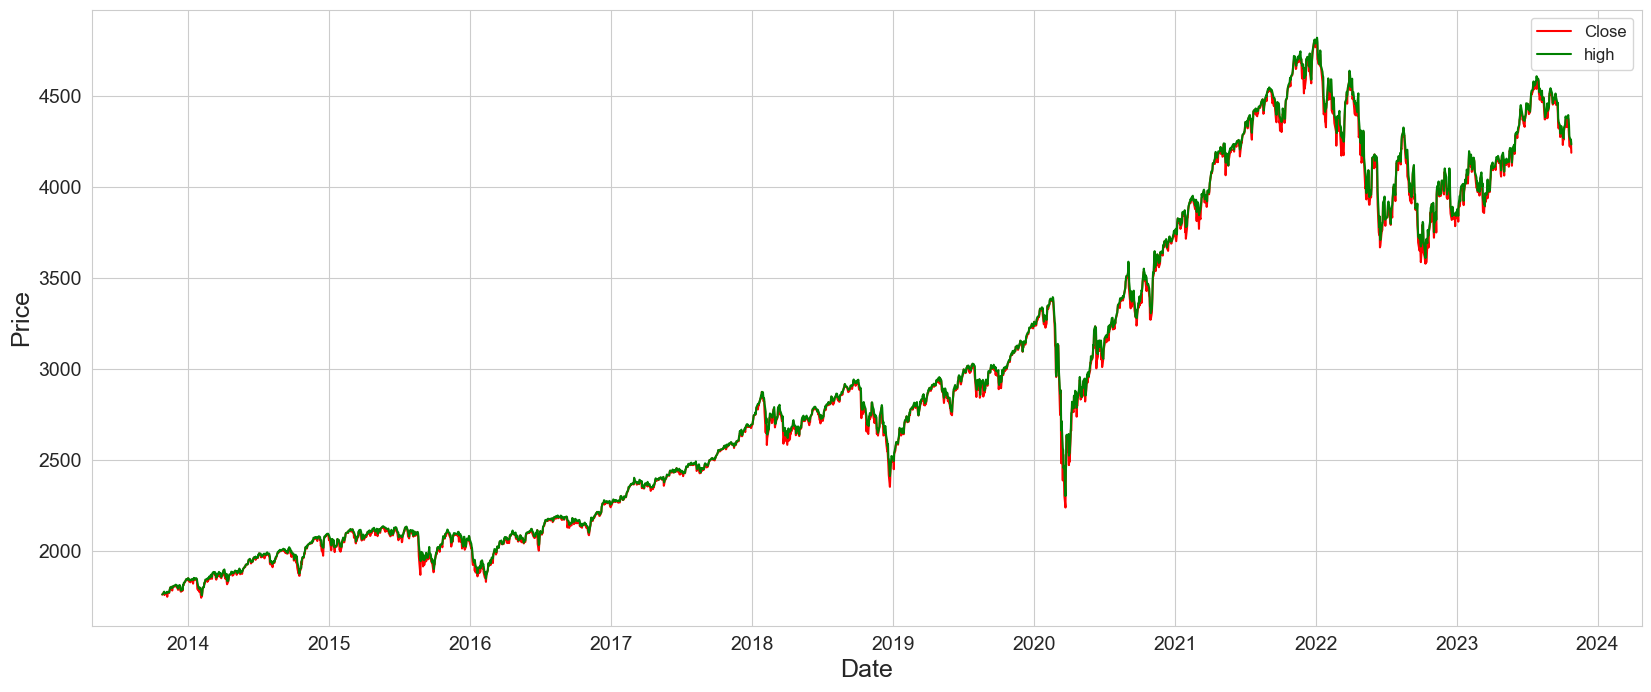

In [17]:
plt.figure(figsize=(20,8))

plt.plot(stock.Date, stock.Close,
         color='red',
         label='Close')

# plt.plot(stock.Date, stock.Open,
#          color='blue',
#          label='Open')

plt.plot(stock.Date, stock.High,
        color='Green',
        label='high')

# plt.plot(stock.Date, stock.Low,
#          color='black',
#          label='low')

plt.legend(fontsize=12)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Closing price exhibits a trend here

# train test split

In [20]:
test_size=14
stock_train=stock.iloc[:-test_size].copy()
stock_test=stock.iloc[-test_size:].copy()
stock_test

,Date,Close,Open,High,Low
2503,2023-10-06,4308.50,4234.79,4324.10,4219.55
2504,2023-10-09,4335.66,4289.02,4341.73,4283.79
2505,2023-10-10,4358.24,4339.75,4385.46,4339.64
2506,2023-10-11,4376.95,4366.59,4378.64,4345.34
2507,2023-10-12,4349.61,4380.94,4385.85,4325.43
2508,2023-10-13,4327.78,4360.49,4377.10,4311.97
2509,2023-10-16,4373.63,4342.37,4383.33,4342.37
2510,2023-10-17,4373.20,4345.23,4393.57,4337.54
2511,2023-10-18,4314.60,4357.35,4364.20,4303.84
2512,2023-10-19,4278.00,4321.36,4339.54,4269.69


# 4 Modeling

## 4-1 Baselinfe forcasting

## 1 average forcast

In [21]:
Train_avg=stock_train.Close.mean()*np.ones(test_size)

In [25]:
from sklearn.metrics import mean_squared_error

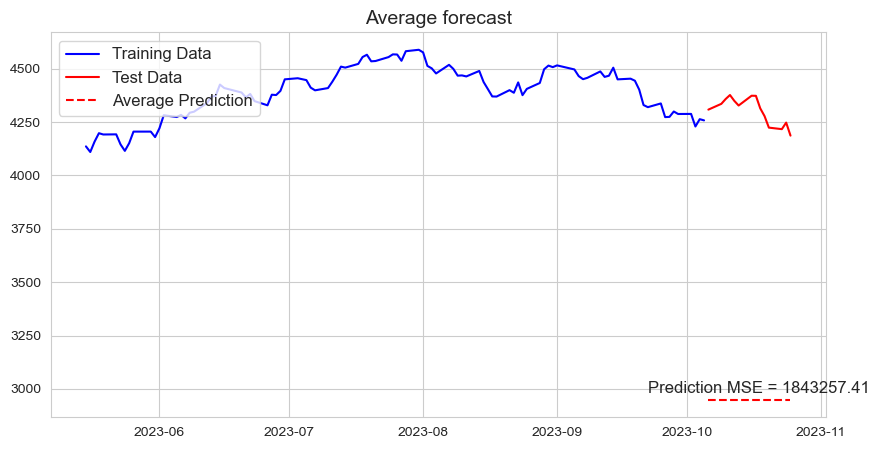

In [29]:
## Plotting the average prediction with the actual data
plt.figure(figsize=(10, 5))

plt.plot(stock_train.Date[-100:],
            stock_train.Close[-100:],
            'b-',
            label="Training Data")

plt.plot(stock_test.Date,
            stock_test.Close,
            'r-',
            label="Test Data")

plt.plot(stock_test.Date,
            Train_avg,
            'r--',
            label="Average Prediction")

plt.text(stock_train.Date.values[-10],
         2980,
         "Prediction MSE = " + str(np.round(mean_squared_error(stock_test.Close.values,
                                                                  Train_avg), 2)),
         fontsize=12)

plt.legend(fontsize=12, loc=2)
plt.title("Average forecast", fontsize=14)
plt.show()

## 2 Naive Forcast

In [34]:
## Making the naive "prediction"
Train_naive = stock_train.Close.values[-1]*np.ones(len(stock_test))

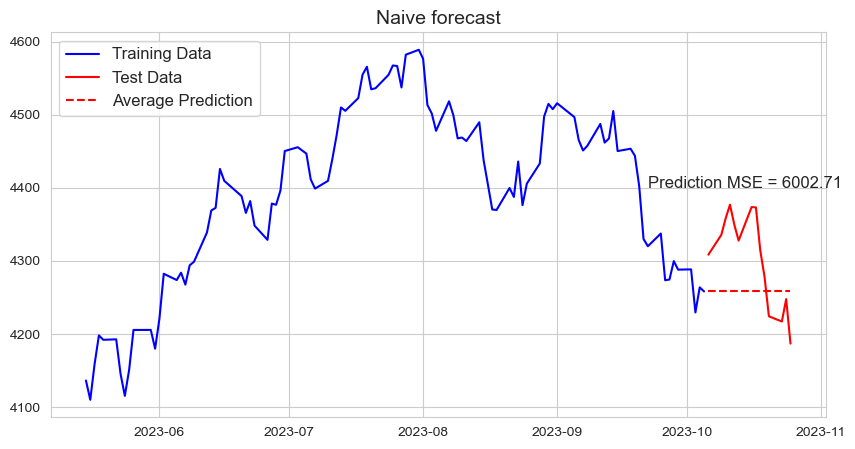

In [41]:
## Plotting the naive prediction with the actual data
plt.figure(figsize=(10, 5))

plt.plot(stock_train.Date[-100:],
            stock_train.Close[-100:],
            'b-',
            label="Training Data")

plt.plot(stock_test.Date,
            stock_test.Close,
            'r-',
            label="Test Data")

plt.plot(stock_test.Date,
            Train_naive,
            'r--',
            label="Average Prediction")

plt.text(stock_train.Date.values[-10],
         4400,
         "Prediction MSE = " + str(np.round(mean_squared_error(stock_test.Close.values,
                                                                  Train_naive), 2)),
         fontsize=12)

plt.legend(fontsize=12, loc=2)
plt.title("Naive forecast", fontsize=14)
plt.show()

### 3 Trend Forcast

In [38]:
## import linear regression
from sklearn.linear_model import LinearRegression

In [51]:
## Make the model object
reg = LinearRegression()

## Fit the model
reg.fit(np.arange(1, len(stock_train)+1).reshape(-1,1),
        stock_train.Close.values)

## Make the forecast
trend_pred = reg.predict(np.arange(len(stock_train)+1, 
                                   len(stock_train)+len(stock_test)+1).reshape(-1,1))

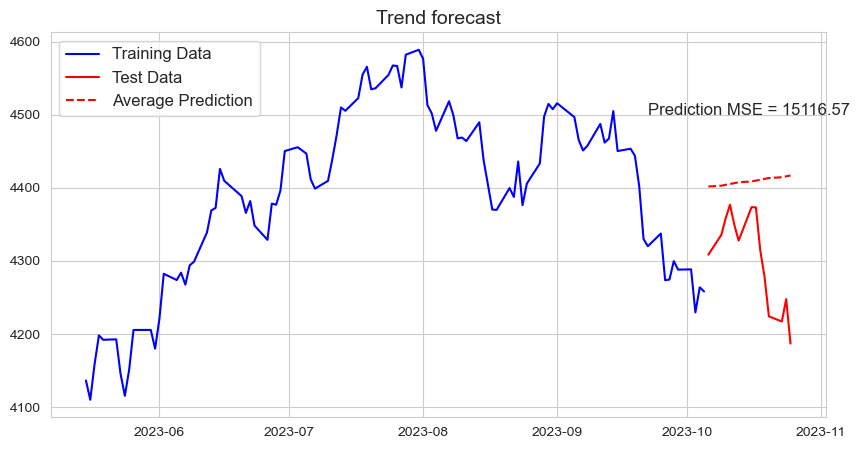

In [52]:
## Plotting the trend prediction with the actual data
plt.figure(figsize=(10, 5))

plt.plot(stock_train.Date[-100:],
            stock_train.Close[-100:],
            'b-',
            label="Training Data")

plt.plot(stock_test.Date,
            stock_test.Close,
            'r-',
            label="Test Data")

plt.plot(stock_test.Date,
            trend_pred,
            'r--',
            label="Average Prediction")

plt.text(stock_train.Date.values[-10],
         4500,
         "Prediction MSE = " + str(np.round(mean_squared_error(stock_test.Close.values,
                                                                  trend_pred), 2)),
         fontsize=12)

plt.legend(fontsize=12, loc=2)
plt.title("Trend forecast", fontsize=14)
plt.show()

## 4 random walk with drift

In [43]:
stock_train.Close.head()

0    1759.77
1    1762.11
2    1771.95
3    1763.31
4    1756.54
Name: Close, dtype: float64

In [44]:
## demonstrate .diff()
stock_train.Close.diff().head()

0     NaN
1    2.34
2    9.84
3   -8.64
4   -6.77
Name: Close, dtype: float64

In [46]:
beta_hat = stock_train.Close.diff()[1:].mean()

drift_pred = stock_train.Close.values[-1] + beta_hat*np.arange(1,len(stock_test) + 1)

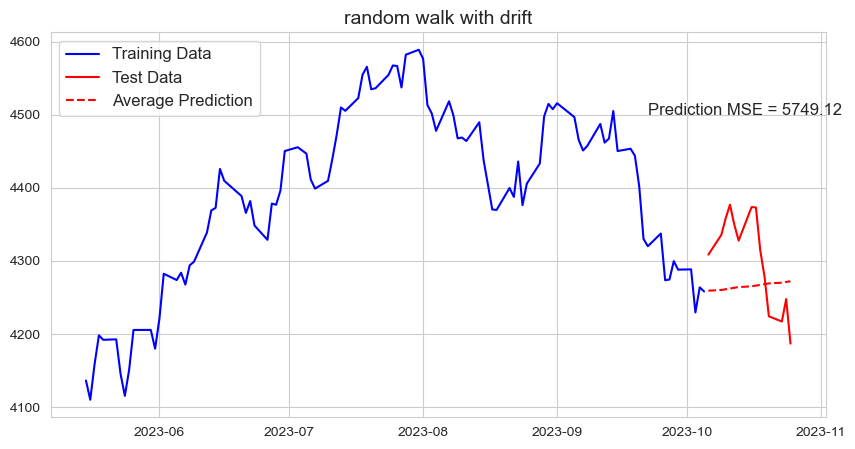

In [48]:
## Plotting the random walk with drift prediction with the actual data
plt.figure(figsize=(10, 5))

plt.plot(stock_train.Date[-100:],
            stock_train.Close[-100:],
            'b-',
            label="Training Data")

plt.plot(stock_test.Date,
            stock_test.Close,
            'r-',
            label="Test Data")

plt.plot(stock_test.Date,
            drift_pred,
            'r--',
            label="Average Prediction")

plt.text(stock_train.Date.values[-10],
         4500,
         "Prediction MSE = " + str(np.round(mean_squared_error(stock_test.Close.values,
                                                                  drift_pred), 2)),
         fontsize=12)

plt.legend(fontsize=12, loc=2)
plt.title("random walk with drift", fontsize=14)
plt.show()

## 5 Calculate the average cross-validation root mean squared error for the above baseline model.

Set up this cross-validation so that there are ten splits and each holdout set only has three observations in it.

In [49]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [50]:
cv = TimeSeriesSplit(10, 
                     test_size=3)

In [55]:
avg_rmses = np.zeros((4,10)) # 4 is the number of models, 10 is the number of splits

i = 0
for train_index, test_index in cv.split(stock_train):
    stock_tt = stock_train.loc[train_index]
    stock_ho = stock_train.loc[test_index]
    
    ########## average ##########
    tt_avg = stock_tt.Close.mean()
    
    avg_rmses[0][i] = np.sqrt(mean_squared_error(stock_ho.Close.values,
                                    tt_avg*np.ones(3)))
    
    ########## Naive ##########
    tt_naive = stock_tt.Close.values[-1]
    
    avg_rmses[1][i] = np.sqrt(mean_squared_error(stock_ho.Close.values,
                                    tt_naive*np.ones(3)))
    
        ########## trend ##########
    slr=LinearRegression()
    slr.fit(np.arange(1, len(stock_tt)+1).reshape(-1,1),
        stock_tt.Close.values)
    tt_trend=slr.predict(np.arange(len(stock_tt)+1, len(stock_tt)+1+len(stock_ho)).reshape(-1,1))
    
    avg_rmses[2][i] = np.sqrt(mean_squared_error(stock_ho.Close.values,
                                    tt_trend))
    
        ########## drift ##########
    beta_hat = stock_tt.Close.diff()[1:].mean()

    tt_drift = stock_tt.Close.values[-1] + beta_hat*np.arange(1,len(stock_ho) + 1)
    
    avg_rmses[3][i] = np.sqrt(mean_squared_error(stock_ho.Close.values,
                                    tt_drift))
    
    
    i = i + 1

In [57]:
##_avg cv rmse_cl
np.mean(avg_rmses, axis=1)

array([1459.23464226,   42.93425497,   95.9805597 ,   43.65815616])

## 6 Moving Average

In [58]:
## To use rolling
## specify the column you want the moving average of
## give the window size as the argument
## then give what you want the moving statistic of, we want the mean()
## Finally set the argument closed='left' to ensure that y_{t+1} is the average
## of the previous k values.
pd.DataFrame({'closing_price':stock_train.Close,
                  'moving_avg':stock_train.Close.rolling(3, 
                                                                closed='left').mean()}).head(10)

,closing_price,moving_avg
0,1759.77,NaN
1,1762.11,NaN
2,1771.95,NaN
3,1763.31,1764.610000
4,1756.54,1765.790000
5,1761.64,1763.933333
6,1767.93,1760.496667
7,1762.97,1762.036667
8,1770.49,1764.180000
9,1747.15,1767.130000


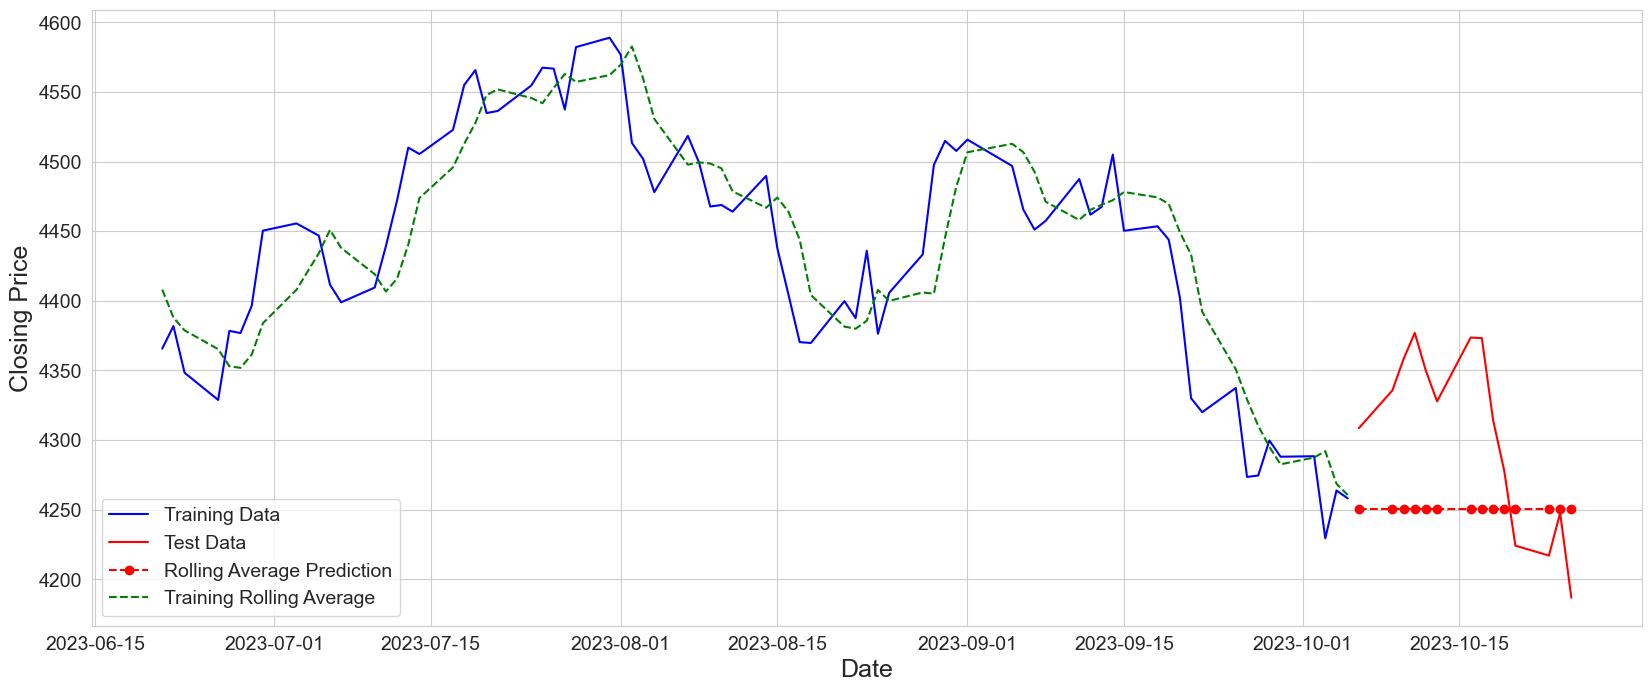

In [64]:
plt.figure(figsize=(20,8))


plt.plot(stock_train.Date[-75:], 
         stock_train.Close[-75:],
         'b',
         label="Training Data")
plt.plot(stock_test.Date, 
         stock_test.Close,
         'r',
         label="Test Data")

plt.plot(stock_test.Date, 
         stock_train.Close[-3:].mean()*np.ones(14),
         'r--o',
         label="Rolling Average Prediction")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.plot(stock_train.Date[-75:], 
         stock_train.Close.rolling(3, closed="left").mean()[-75:],
         'g--',
         label="Training Rolling Average")

plt
plt.legend(fontsize=14, loc=3)

plt.show()

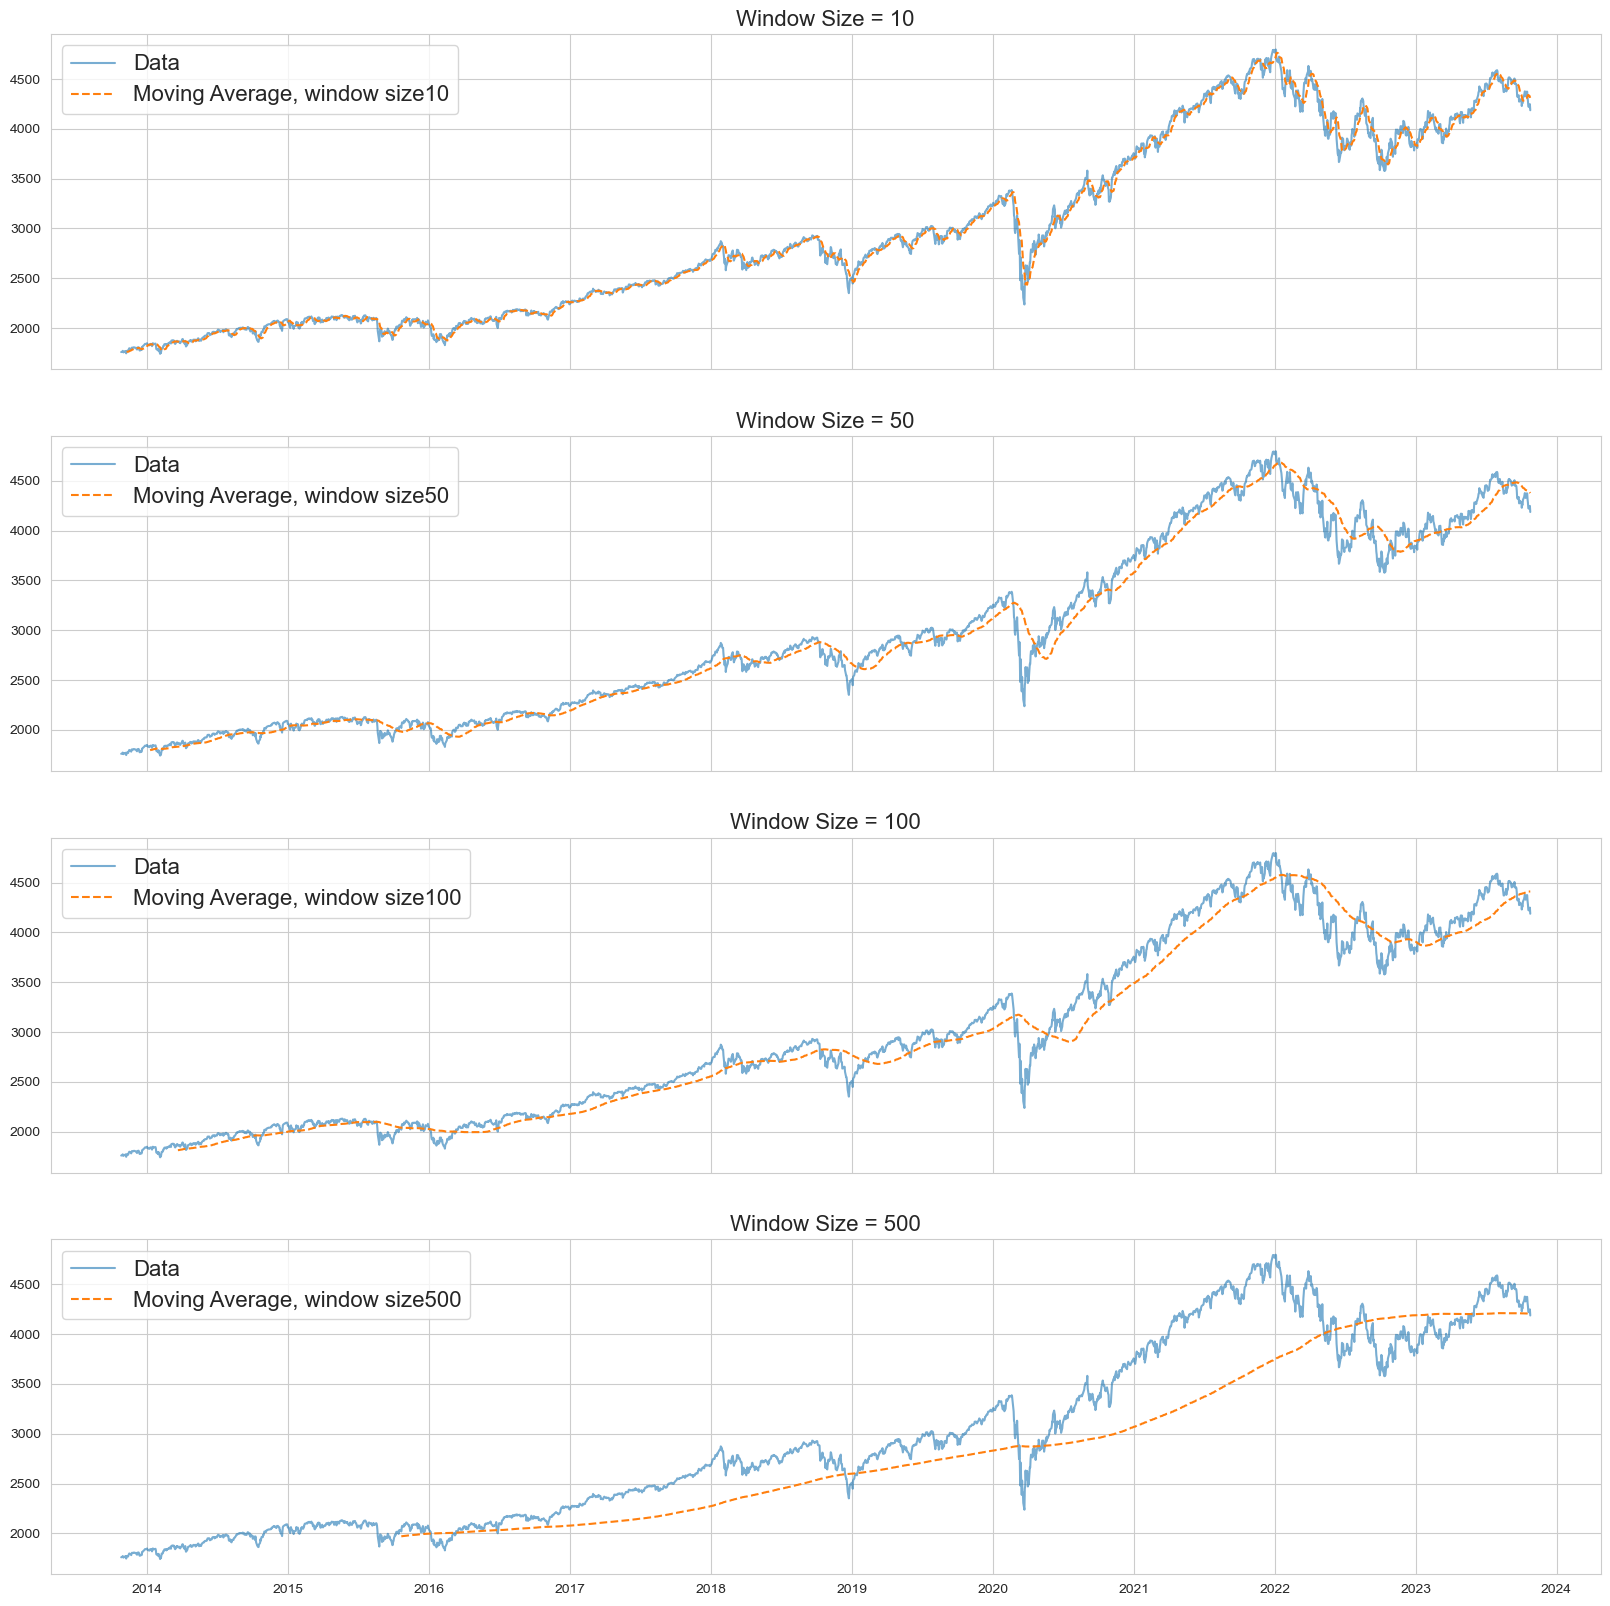

In [68]:
#change the size of window
size=[10,50,100,500]
#label=['Window Size = 10','Window Size = 100','Window Size = 500','Window Size = 1000']
fig,ax = plt.subplots(len(size), 1, figsize=(20,20), sharex=True, sharey=True)

for i in range(len(size)):
    ax[i].plot(stock.Date, 
               stock.Close,
               alpha=.6,
               label="Data")
    ax[i].plot(stock.Date, 
           stock.Close.rolling(size[i], closed='left').mean(),
           '--',
           linewidth=1.5,
           label="Moving Average, window size"+str(size[i]))

    ax[i].legend(fontsize=16)
    ax[i].set_title("Window Size = "+str(size[i]), fontsize=16)


# plt.xlabel("Date", fontsize=18)
# plt.ylabel("Closing Price", fontsize=18)

# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

plt.show()

###  tuning the moving average window size,  𝑞, to find the value that minimizes the average cross-validation root mean squared error (RMSE).

In [69]:
cv1 = TimeSeriesSplit(10, test_size=3)

start = 2
end = 31
ma_rmses = np.zeros((10, len(range(start, end))))


i = 0
for train_index, test_index in cv1.split(stock_train):
    stock_tt1 = stock_train.iloc[train_index]
    stock_ho1 = stock_train.iloc[test_index]
    
    j = 0
    for q in range(start, end):
        pred_win = stock_tt1.Close[-q:].mean() * np.ones(len(stock_ho1))
        
        ma_rmses[i,j] = np.sqrt(mean_squared_error(stock_ho1.Close.values, pred_win))
        j = j + 1
    i = i + 1

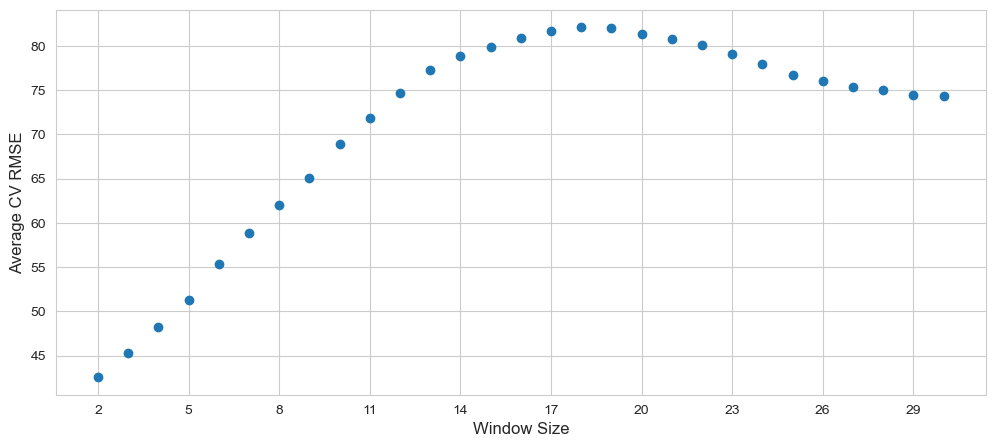

In [70]:
plt.figure(figsize=(12,5))

plt.scatter(range(start,end), np.mean(ma_rmses, axis=0))

plt.xlabel("Window Size", fontsize=12)
plt.ylabel("Average CV RMSE", fontsize=12)

plt.xticks(range(start, end, 3), fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [71]:
print("The window size that minimized the avg. cv rmse",
      "was q =", 
      range(start,end)[np.argmin(np.mean(ma_rmses, axis=0))],
      "\b.",
      "It had a mean cv rmse of", 
      np.round(np.min(np.mean(ma_rmses, axis=0)), 3))

The window size that minimized the avg. cv rmse was q = 2 . It had a mean cv rmse of 42.547


## 7 Exponential Smoothing

### Simple exponential smoothing

In [73]:
## Importing statsmodels to check that we have it installed
import statsmodels as sm

In [74]:
## printing the statsmodels version
## I had version 0.13.1 when I wrote this notebook
print(sm.__version__)

0.13.5


In [75]:
## Importing the model from statsmodels
from statsmodels.tsa.api import SimpleExpSmoothing

In [78]:
## To fit a SimpleExpSmoothing model you
## First call SimpleExpSmoothing with the training data
## then .fit
## with smoothing_level, this is alpha
## and optimized=False, if this is True alpha is found using the method of maximum likelihood
simp_exp_smooth = SimpleExpSmoothing(stock_train.Close).fit(smoothing_level=.7,
                                                                   optimized=False)

In [79]:
simp_exp_smooth.fittedvalues

0       1759.770000
1       1759.770000
2       1761.408000
3       1768.787400
4       1764.953220
           ...     
2498    4293.726333
2499    4289.752900
2500    4288.798870
2501    4247.254661
2502    4258.801398
Length: 2503, dtype: float64

In [83]:
simp_exp_smooth.forecast(len(stock_test))

2503    4258.373419
2504    4258.373419
2505    4258.373419
2506    4258.373419
2507    4258.373419
2508    4258.373419
2509    4258.373419
2510    4258.373419
2511    4258.373419
2512    4258.373419
2513    4258.373419
2514    4258.373419
2515    4258.373419
2516    4258.373419
dtype: float64

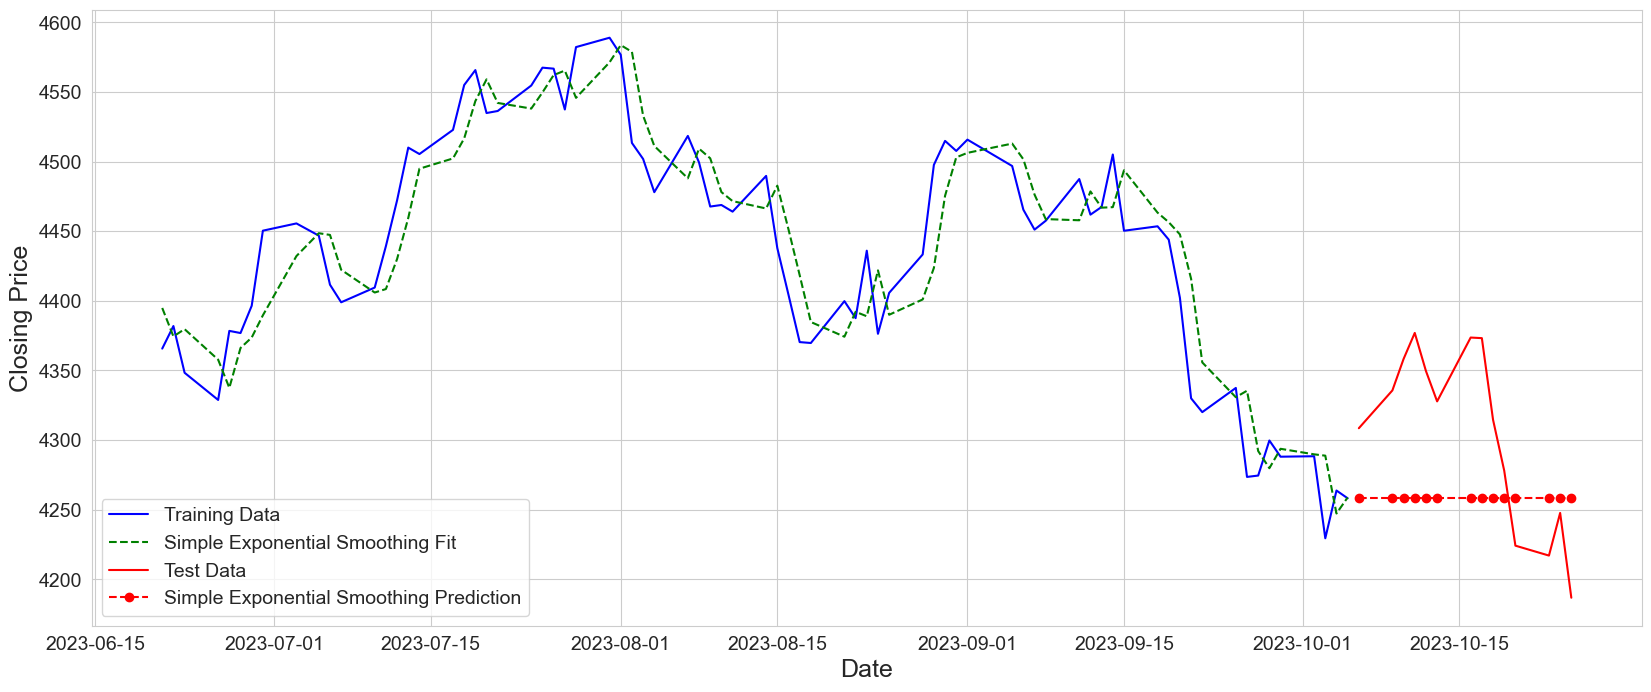

In [86]:
plt.figure(figsize=(20,8))


plt.plot(stock_train.Date[-75:], 
         stock_train.Close[-75:],
         'b',
         label="Training Data")


## We can get the fitted values with fittedvalues
plt.plot(stock_train.Date[-75:], 
         simp_exp_smooth.fittedvalues[-75:],
         'g--',
         label="Simple Exponential Smoothing Fit")

plt.plot(stock_test.Date, 
         stock_test.Close,
         'r',
         label="Test Data")

## We can get the forecast with .forecast(h)
plt.plot(stock_test.Date, 
         simp_exp_smooth.forecast(14),
         'r--o',
         label="Simple Exponential Smoothing Prediction")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

### Double Exponential Smoothing 

In [87]:
from statsmodels.tsa.holtwinters import Holt

In [88]:
## Here in addition to setting a smoothing_level
## we also set a smoothing_trend, which is the value of beta
## again we set optimized = False, unless we'd rather choose alpha and beta through
## maximum likelihood estimation
exp_smooth = Holt(stock_train.Close.values).fit(smoothing_level=0.6, 
                                          smoothing_trend=0.6,
                                          optimized=False)

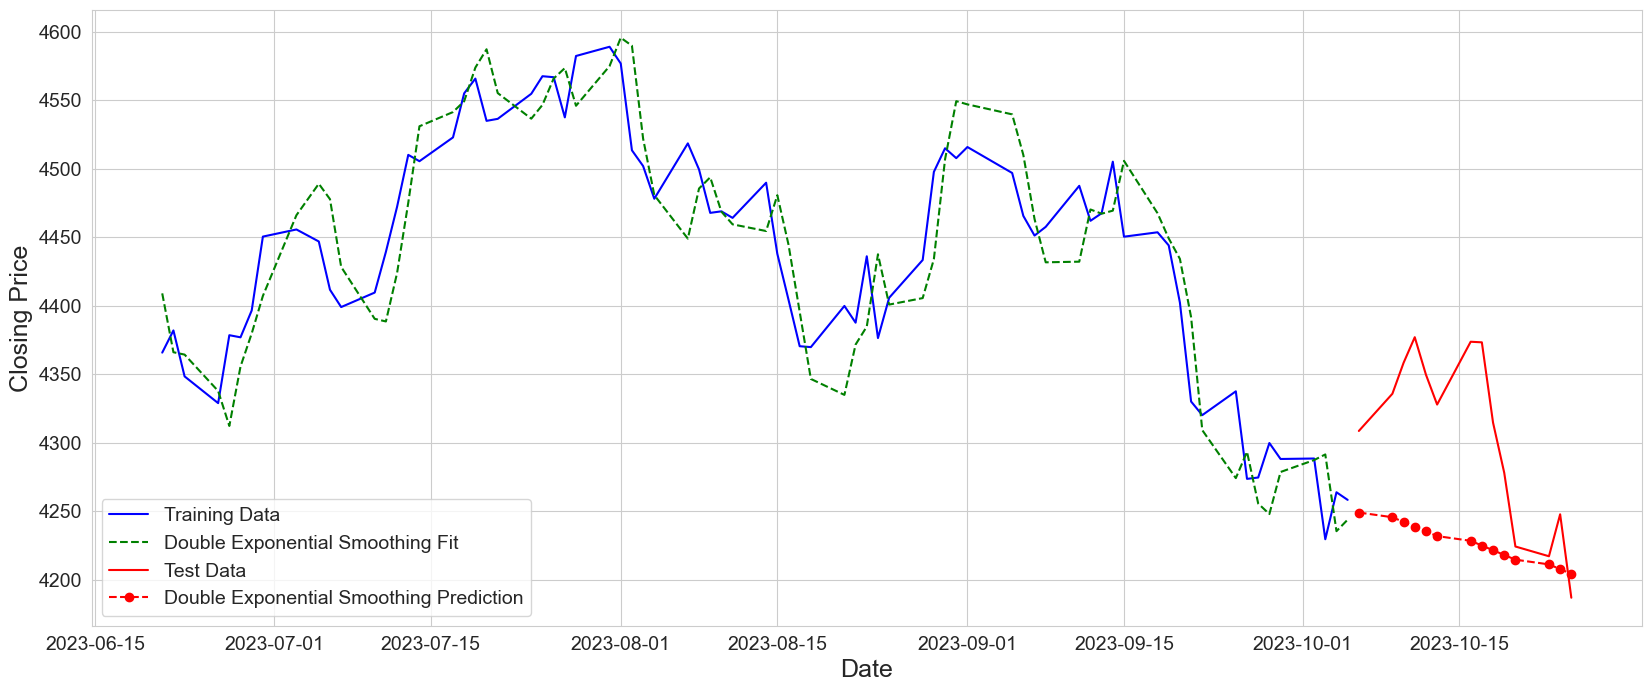

In [89]:
plt.figure(figsize=(20,8))


plt.plot(stock_train.Date[-75:], 
         stock_train.Close[-75:],
         'b',
         label="Training Data")


## We can get the fitted values with fittedvalues
plt.plot(stock_train.Date[-75:], 
         exp_smooth.fittedvalues[-75:],
         'g--',
         label="Double Exponential Smoothing Fit")

plt.plot(stock_test.Date, 
         stock_test.Close,
         'r',
         label="Test Data")

## We can get the forecast with .forecast(h)
plt.plot(stock_test.Date, 
         exp_smooth.forecast(14),
         'r--o',
         label="Double Exponential Smoothing Prediction")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()



find the best $\alpha$ (The smoothing on the time series) and $\beta$ (the smoothing on the trend component) by performing a grid search
that minimize the average CV RMSE

In [91]:
exp_rmses = np.zeros((10, len(np.arange(0, 0.2, .01)), len(np.arange(0, 0.2, .01))))

i = 0
for train_index, test_index in cv1.split(stock_train):
    stock_tt1 = stock_train.iloc[train_index]
    stock_ho1 = stock_train.iloc[test_index]
    
    j = 0
    for alpha in np.arange(0, 0.2, .01):
        k = 0
        for beta in np.arange(0, 0.2, .01):
            print("alpha =", alpha,
                     "beta =", beta)

            exp_smooth = Holt(stock_tt1.Close.values).fit(smoothing_level=alpha, 
                                                                      smoothing_trend=beta,
                                                                      optimized=False)

            exp_rmses[i,j,k] = np.sqrt(mean_squared_error(stock_ho1.Close.values, 
                                                          exp_smooth.forecast(len(stock_ho1))))
            k = k + 1
        j = j + 1
    i = i + 1

alpha = 0.0 beta = 0.0
alpha = 0.0 beta = 0.01
alpha = 0.0 beta = 0.02
alpha = 0.0 beta = 0.03
alpha = 0.0 beta = 0.04
alpha = 0.0 beta = 0.05
alpha = 0.0 beta = 0.06
alpha = 0.0 beta = 0.07
alpha = 0.0 beta = 0.08
alpha = 0.0 beta = 0.09
alpha = 0.0 beta = 0.1
alpha = 0.0 beta = 0.11
alpha = 0.0 beta = 0.12
alpha = 0.0 beta = 0.13
alpha = 0.0 beta = 0.14
alpha = 0.0 beta = 0.15
alpha = 0.0 beta = 0.16
alpha = 0.0 beta = 0.17
alpha = 0.0 beta = 0.18
alpha = 0.0 beta = 0.19
alpha = 0.01 beta = 0.0
alpha = 0.01 beta = 0.01
alpha = 0.01 beta = 0.02
alpha = 0.01 beta = 0.03
alpha = 0.01 beta = 0.04
alpha = 0.01 beta = 0.05
alpha = 0.01 beta = 0.06
alpha = 0.01 beta = 0.07
alpha = 0.01 beta = 0.08
alpha = 0.01 beta = 0.09
alpha = 0.01 beta = 0.1
alpha = 0.01 beta = 0.11
alpha = 0.01 beta = 0.12
alpha = 0.01 beta = 0.13
alpha = 0.01 beta = 0.14
alpha = 0.01 beta = 0.15
alpha = 0.01 beta = 0.16
alpha = 0.01 beta = 0.17
alpha = 0.01 beta = 0.18
alpha = 0.01 beta = 0.19
alpha = 0.02 beta = 0.0


alpha = 0.16 beta = 0.14
alpha = 0.16 beta = 0.15
alpha = 0.16 beta = 0.16
alpha = 0.16 beta = 0.17
alpha = 0.16 beta = 0.18
alpha = 0.16 beta = 0.19
alpha = 0.17 beta = 0.0
alpha = 0.17 beta = 0.01
alpha = 0.17 beta = 0.02
alpha = 0.17 beta = 0.03
alpha = 0.17 beta = 0.04
alpha = 0.17 beta = 0.05
alpha = 0.17 beta = 0.06
alpha = 0.17 beta = 0.07
alpha = 0.17 beta = 0.08
alpha = 0.17 beta = 0.09
alpha = 0.17 beta = 0.1
alpha = 0.17 beta = 0.11
alpha = 0.17 beta = 0.12
alpha = 0.17 beta = 0.13
alpha = 0.17 beta = 0.14
alpha = 0.17 beta = 0.15
alpha = 0.17 beta = 0.16
alpha = 0.17 beta = 0.17
alpha = 0.17 beta = 0.18
alpha = 0.17 beta = 0.19
alpha = 0.18 beta = 0.0
alpha = 0.18 beta = 0.01
alpha = 0.18 beta = 0.02
alpha = 0.18 beta = 0.03
alpha = 0.18 beta = 0.04
alpha = 0.18 beta = 0.05
alpha = 0.18 beta = 0.06
alpha = 0.18 beta = 0.07
alpha = 0.18 beta = 0.08
alpha = 0.18 beta = 0.09
alpha = 0.18 beta = 0.1
alpha = 0.18 beta = 0.11
alpha = 0.18 beta = 0.12
alpha = 0.18 beta = 0.13
alph

alpha = 0.13 beta = 0.09
alpha = 0.13 beta = 0.1
alpha = 0.13 beta = 0.11
alpha = 0.13 beta = 0.12
alpha = 0.13 beta = 0.13
alpha = 0.13 beta = 0.14
alpha = 0.13 beta = 0.15
alpha = 0.13 beta = 0.16
alpha = 0.13 beta = 0.17
alpha = 0.13 beta = 0.18
alpha = 0.13 beta = 0.19
alpha = 0.14 beta = 0.0
alpha = 0.14 beta = 0.01
alpha = 0.14 beta = 0.02
alpha = 0.14 beta = 0.03
alpha = 0.14 beta = 0.04
alpha = 0.14 beta = 0.05
alpha = 0.14 beta = 0.06
alpha = 0.14 beta = 0.07
alpha = 0.14 beta = 0.08
alpha = 0.14 beta = 0.09
alpha = 0.14 beta = 0.1
alpha = 0.14 beta = 0.11
alpha = 0.14 beta = 0.12
alpha = 0.14 beta = 0.13
alpha = 0.14 beta = 0.14
alpha = 0.14 beta = 0.15
alpha = 0.14 beta = 0.16
alpha = 0.14 beta = 0.17
alpha = 0.14 beta = 0.18
alpha = 0.14 beta = 0.19
alpha = 0.15 beta = 0.0
alpha = 0.15 beta = 0.01
alpha = 0.15 beta = 0.02
alpha = 0.15 beta = 0.03
alpha = 0.15 beta = 0.04
alpha = 0.15 beta = 0.05
alpha = 0.15 beta = 0.06
alpha = 0.15 beta = 0.07
alpha = 0.15 beta = 0.08
alph

alpha = 0.1 beta = 0.04
alpha = 0.1 beta = 0.05
alpha = 0.1 beta = 0.06
alpha = 0.1 beta = 0.07
alpha = 0.1 beta = 0.08
alpha = 0.1 beta = 0.09
alpha = 0.1 beta = 0.1
alpha = 0.1 beta = 0.11
alpha = 0.1 beta = 0.12
alpha = 0.1 beta = 0.13
alpha = 0.1 beta = 0.14
alpha = 0.1 beta = 0.15
alpha = 0.1 beta = 0.16
alpha = 0.1 beta = 0.17
alpha = 0.1 beta = 0.18
alpha = 0.1 beta = 0.19
alpha = 0.11 beta = 0.0
alpha = 0.11 beta = 0.01
alpha = 0.11 beta = 0.02
alpha = 0.11 beta = 0.03
alpha = 0.11 beta = 0.04
alpha = 0.11 beta = 0.05
alpha = 0.11 beta = 0.06
alpha = 0.11 beta = 0.07
alpha = 0.11 beta = 0.08
alpha = 0.11 beta = 0.09
alpha = 0.11 beta = 0.1
alpha = 0.11 beta = 0.11
alpha = 0.11 beta = 0.12
alpha = 0.11 beta = 0.13
alpha = 0.11 beta = 0.14
alpha = 0.11 beta = 0.15
alpha = 0.11 beta = 0.16
alpha = 0.11 beta = 0.17
alpha = 0.11 beta = 0.18
alpha = 0.11 beta = 0.19
alpha = 0.12 beta = 0.0
alpha = 0.12 beta = 0.01
alpha = 0.12 beta = 0.02
alpha = 0.12 beta = 0.03
alpha = 0.12 beta = 

alpha = 0.06 beta = 0.18
alpha = 0.06 beta = 0.19
alpha = 0.07 beta = 0.0
alpha = 0.07 beta = 0.01
alpha = 0.07 beta = 0.02
alpha = 0.07 beta = 0.03
alpha = 0.07 beta = 0.04
alpha = 0.07 beta = 0.05
alpha = 0.07 beta = 0.06
alpha = 0.07 beta = 0.07
alpha = 0.07 beta = 0.08
alpha = 0.07 beta = 0.09
alpha = 0.07 beta = 0.1
alpha = 0.07 beta = 0.11
alpha = 0.07 beta = 0.12
alpha = 0.07 beta = 0.13
alpha = 0.07 beta = 0.14
alpha = 0.07 beta = 0.15
alpha = 0.07 beta = 0.16
alpha = 0.07 beta = 0.17
alpha = 0.07 beta = 0.18
alpha = 0.07 beta = 0.19
alpha = 0.08 beta = 0.0
alpha = 0.08 beta = 0.01
alpha = 0.08 beta = 0.02
alpha = 0.08 beta = 0.03
alpha = 0.08 beta = 0.04
alpha = 0.08 beta = 0.05
alpha = 0.08 beta = 0.06
alpha = 0.08 beta = 0.07
alpha = 0.08 beta = 0.08
alpha = 0.08 beta = 0.09
alpha = 0.08 beta = 0.1
alpha = 0.08 beta = 0.11
alpha = 0.08 beta = 0.12
alpha = 0.08 beta = 0.13
alpha = 0.08 beta = 0.14
alpha = 0.08 beta = 0.15
alpha = 0.08 beta = 0.16
alpha = 0.08 beta = 0.17
alph

alpha = 0.03 beta = 0.15
alpha = 0.03 beta = 0.16
alpha = 0.03 beta = 0.17
alpha = 0.03 beta = 0.18
alpha = 0.03 beta = 0.19
alpha = 0.04 beta = 0.0
alpha = 0.04 beta = 0.01
alpha = 0.04 beta = 0.02
alpha = 0.04 beta = 0.03
alpha = 0.04 beta = 0.04
alpha = 0.04 beta = 0.05
alpha = 0.04 beta = 0.06
alpha = 0.04 beta = 0.07
alpha = 0.04 beta = 0.08
alpha = 0.04 beta = 0.09
alpha = 0.04 beta = 0.1
alpha = 0.04 beta = 0.11
alpha = 0.04 beta = 0.12
alpha = 0.04 beta = 0.13
alpha = 0.04 beta = 0.14
alpha = 0.04 beta = 0.15
alpha = 0.04 beta = 0.16
alpha = 0.04 beta = 0.17
alpha = 0.04 beta = 0.18
alpha = 0.04 beta = 0.19
alpha = 0.05 beta = 0.0
alpha = 0.05 beta = 0.01
alpha = 0.05 beta = 0.02
alpha = 0.05 beta = 0.03
alpha = 0.05 beta = 0.04
alpha = 0.05 beta = 0.05
alpha = 0.05 beta = 0.06
alpha = 0.05 beta = 0.07
alpha = 0.05 beta = 0.08
alpha = 0.05 beta = 0.09
alpha = 0.05 beta = 0.1
alpha = 0.05 beta = 0.11
alpha = 0.05 beta = 0.12
alpha = 0.05 beta = 0.13
alpha = 0.05 beta = 0.14
alph

alpha = 0.0 beta = 0.13
alpha = 0.0 beta = 0.14
alpha = 0.0 beta = 0.15
alpha = 0.0 beta = 0.16
alpha = 0.0 beta = 0.17
alpha = 0.0 beta = 0.18
alpha = 0.0 beta = 0.19
alpha = 0.01 beta = 0.0
alpha = 0.01 beta = 0.01
alpha = 0.01 beta = 0.02
alpha = 0.01 beta = 0.03
alpha = 0.01 beta = 0.04
alpha = 0.01 beta = 0.05
alpha = 0.01 beta = 0.06
alpha = 0.01 beta = 0.07
alpha = 0.01 beta = 0.08
alpha = 0.01 beta = 0.09
alpha = 0.01 beta = 0.1
alpha = 0.01 beta = 0.11
alpha = 0.01 beta = 0.12
alpha = 0.01 beta = 0.13
alpha = 0.01 beta = 0.14
alpha = 0.01 beta = 0.15
alpha = 0.01 beta = 0.16
alpha = 0.01 beta = 0.17
alpha = 0.01 beta = 0.18
alpha = 0.01 beta = 0.19
alpha = 0.02 beta = 0.0
alpha = 0.02 beta = 0.01
alpha = 0.02 beta = 0.02
alpha = 0.02 beta = 0.03
alpha = 0.02 beta = 0.04
alpha = 0.02 beta = 0.05
alpha = 0.02 beta = 0.06
alpha = 0.02 beta = 0.07
alpha = 0.02 beta = 0.08
alpha = 0.02 beta = 0.09
alpha = 0.02 beta = 0.1
alpha = 0.02 beta = 0.11
alpha = 0.02 beta = 0.12
alpha = 0.0

alpha = 0.17 beta = 0.04
alpha = 0.17 beta = 0.05
alpha = 0.17 beta = 0.06
alpha = 0.17 beta = 0.07
alpha = 0.17 beta = 0.08
alpha = 0.17 beta = 0.09
alpha = 0.17 beta = 0.1
alpha = 0.17 beta = 0.11
alpha = 0.17 beta = 0.12
alpha = 0.17 beta = 0.13
alpha = 0.17 beta = 0.14
alpha = 0.17 beta = 0.15
alpha = 0.17 beta = 0.16
alpha = 0.17 beta = 0.17
alpha = 0.17 beta = 0.18
alpha = 0.17 beta = 0.19
alpha = 0.18 beta = 0.0
alpha = 0.18 beta = 0.01
alpha = 0.18 beta = 0.02
alpha = 0.18 beta = 0.03
alpha = 0.18 beta = 0.04
alpha = 0.18 beta = 0.05
alpha = 0.18 beta = 0.06
alpha = 0.18 beta = 0.07
alpha = 0.18 beta = 0.08
alpha = 0.18 beta = 0.09
alpha = 0.18 beta = 0.1
alpha = 0.18 beta = 0.11
alpha = 0.18 beta = 0.12
alpha = 0.18 beta = 0.13
alpha = 0.18 beta = 0.14
alpha = 0.18 beta = 0.15
alpha = 0.18 beta = 0.16
alpha = 0.18 beta = 0.17
alpha = 0.18 beta = 0.18
alpha = 0.18 beta = 0.19
alpha = 0.19 beta = 0.0
alpha = 0.19 beta = 0.01
alpha = 0.19 beta = 0.02
alpha = 0.19 beta = 0.03
alph

alpha = 0.13 beta = 0.15
alpha = 0.13 beta = 0.16
alpha = 0.13 beta = 0.17
alpha = 0.13 beta = 0.18
alpha = 0.13 beta = 0.19
alpha = 0.14 beta = 0.0
alpha = 0.14 beta = 0.01
alpha = 0.14 beta = 0.02
alpha = 0.14 beta = 0.03
alpha = 0.14 beta = 0.04
alpha = 0.14 beta = 0.05
alpha = 0.14 beta = 0.06
alpha = 0.14 beta = 0.07
alpha = 0.14 beta = 0.08
alpha = 0.14 beta = 0.09
alpha = 0.14 beta = 0.1
alpha = 0.14 beta = 0.11
alpha = 0.14 beta = 0.12
alpha = 0.14 beta = 0.13
alpha = 0.14 beta = 0.14
alpha = 0.14 beta = 0.15
alpha = 0.14 beta = 0.16
alpha = 0.14 beta = 0.17
alpha = 0.14 beta = 0.18
alpha = 0.14 beta = 0.19
alpha = 0.15 beta = 0.0
alpha = 0.15 beta = 0.01
alpha = 0.15 beta = 0.02
alpha = 0.15 beta = 0.03
alpha = 0.15 beta = 0.04
alpha = 0.15 beta = 0.05
alpha = 0.15 beta = 0.06
alpha = 0.15 beta = 0.07
alpha = 0.15 beta = 0.08
alpha = 0.15 beta = 0.09
alpha = 0.15 beta = 0.1
alpha = 0.15 beta = 0.11
alpha = 0.15 beta = 0.12
alpha = 0.15 beta = 0.13
alpha = 0.15 beta = 0.14
alph

alpha = 0.1 beta = 0.06
alpha = 0.1 beta = 0.07
alpha = 0.1 beta = 0.08
alpha = 0.1 beta = 0.09
alpha = 0.1 beta = 0.1
alpha = 0.1 beta = 0.11
alpha = 0.1 beta = 0.12
alpha = 0.1 beta = 0.13
alpha = 0.1 beta = 0.14
alpha = 0.1 beta = 0.15
alpha = 0.1 beta = 0.16
alpha = 0.1 beta = 0.17
alpha = 0.1 beta = 0.18
alpha = 0.1 beta = 0.19
alpha = 0.11 beta = 0.0
alpha = 0.11 beta = 0.01
alpha = 0.11 beta = 0.02
alpha = 0.11 beta = 0.03
alpha = 0.11 beta = 0.04
alpha = 0.11 beta = 0.05
alpha = 0.11 beta = 0.06
alpha = 0.11 beta = 0.07
alpha = 0.11 beta = 0.08
alpha = 0.11 beta = 0.09
alpha = 0.11 beta = 0.1
alpha = 0.11 beta = 0.11
alpha = 0.11 beta = 0.12
alpha = 0.11 beta = 0.13
alpha = 0.11 beta = 0.14
alpha = 0.11 beta = 0.15
alpha = 0.11 beta = 0.16
alpha = 0.11 beta = 0.17
alpha = 0.11 beta = 0.18
alpha = 0.11 beta = 0.19
alpha = 0.12 beta = 0.0
alpha = 0.12 beta = 0.01
alpha = 0.12 beta = 0.02
alpha = 0.12 beta = 0.03
alpha = 0.12 beta = 0.04
alpha = 0.12 beta = 0.05
alpha = 0.12 beta 

alpha = 0.06 beta = 0.19
alpha = 0.07 beta = 0.0
alpha = 0.07 beta = 0.01
alpha = 0.07 beta = 0.02
alpha = 0.07 beta = 0.03
alpha = 0.07 beta = 0.04
alpha = 0.07 beta = 0.05
alpha = 0.07 beta = 0.06
alpha = 0.07 beta = 0.07
alpha = 0.07 beta = 0.08
alpha = 0.07 beta = 0.09
alpha = 0.07 beta = 0.1
alpha = 0.07 beta = 0.11
alpha = 0.07 beta = 0.12
alpha = 0.07 beta = 0.13
alpha = 0.07 beta = 0.14
alpha = 0.07 beta = 0.15
alpha = 0.07 beta = 0.16
alpha = 0.07 beta = 0.17
alpha = 0.07 beta = 0.18
alpha = 0.07 beta = 0.19
alpha = 0.08 beta = 0.0
alpha = 0.08 beta = 0.01
alpha = 0.08 beta = 0.02
alpha = 0.08 beta = 0.03
alpha = 0.08 beta = 0.04
alpha = 0.08 beta = 0.05
alpha = 0.08 beta = 0.06
alpha = 0.08 beta = 0.07
alpha = 0.08 beta = 0.08
alpha = 0.08 beta = 0.09
alpha = 0.08 beta = 0.1
alpha = 0.08 beta = 0.11
alpha = 0.08 beta = 0.12
alpha = 0.08 beta = 0.13
alpha = 0.08 beta = 0.14
alpha = 0.08 beta = 0.15
alpha = 0.08 beta = 0.16
alpha = 0.08 beta = 0.17
alpha = 0.08 beta = 0.18
alph

alpha = 0.03 beta = 0.14
alpha = 0.03 beta = 0.15
alpha = 0.03 beta = 0.16
alpha = 0.03 beta = 0.17
alpha = 0.03 beta = 0.18
alpha = 0.03 beta = 0.19
alpha = 0.04 beta = 0.0
alpha = 0.04 beta = 0.01
alpha = 0.04 beta = 0.02
alpha = 0.04 beta = 0.03
alpha = 0.04 beta = 0.04
alpha = 0.04 beta = 0.05
alpha = 0.04 beta = 0.06
alpha = 0.04 beta = 0.07
alpha = 0.04 beta = 0.08
alpha = 0.04 beta = 0.09
alpha = 0.04 beta = 0.1
alpha = 0.04 beta = 0.11
alpha = 0.04 beta = 0.12
alpha = 0.04 beta = 0.13
alpha = 0.04 beta = 0.14
alpha = 0.04 beta = 0.15
alpha = 0.04 beta = 0.16
alpha = 0.04 beta = 0.17
alpha = 0.04 beta = 0.18
alpha = 0.04 beta = 0.19
alpha = 0.05 beta = 0.0
alpha = 0.05 beta = 0.01
alpha = 0.05 beta = 0.02
alpha = 0.05 beta = 0.03
alpha = 0.05 beta = 0.04
alpha = 0.05 beta = 0.05
alpha = 0.05 beta = 0.06
alpha = 0.05 beta = 0.07
alpha = 0.05 beta = 0.08
alpha = 0.05 beta = 0.09
alpha = 0.05 beta = 0.1
alpha = 0.05 beta = 0.11
alpha = 0.05 beta = 0.12
alpha = 0.05 beta = 0.13
alph

In [92]:
## This gives us the indices of the smallest
## avg cv rmse
exp_ind = np.unravel_index(np.argmin(np.mean(exp_rmses, axis=0), axis=None), 
                           np.mean(exp_rmses, axis=0).shape)
np.unravel_index(np.argmin(np.mean(exp_rmses, axis=0), axis=None), 
                 np.mean(exp_rmses, axis=0).shape)

(4, 15)

In [93]:
print("The alpha and beta values that give a double exponential",
         "smoothing model with lowest avg cv rmse are",
         "alpha = ", np.arange(0, 0.2, .01)[exp_ind[0]],
         "and beta = ", np.arange(0, 0.2, .01)[exp_ind[1]])

print("This model had an avg cv rmse of",
         np.round(np.mean(exp_rmses, axis=0)[exp_ind],3))

The alpha and beta values that give a double exponential smoothing model with lowest avg cv rmse are alpha =  0.04 and beta =  0.15
This model had an avg cv rmse of 52.966
